# Student Performance Project

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Dataset

In [ ]:
df = pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### Change columns name for more cadable

In [ ]:
df.columns = ['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index']

df.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

## Label Encoding

In [ ]:
label_encoder = LabelEncoder()
df['extracurricular_activities'] = label_encoder.fit_transform(df['extracurricular_activities'])
df

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


## split dataframe to train and test

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2)
train_df.shape, test_df.shape

((8000, 6), (2000, 6))

## Checking for missing values

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 8856 to 7336
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     8000 non-null   int64  
 1   previous_scores                   8000 non-null   int64  
 2   extracurricular_activities        8000 non-null   int64  
 3   sleep_hours                       8000 non-null   int64  
 4   sample_question_papers_practiced  8000 non-null   int64  
 5   performance_index                 8000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 437.5 KB


## EDA

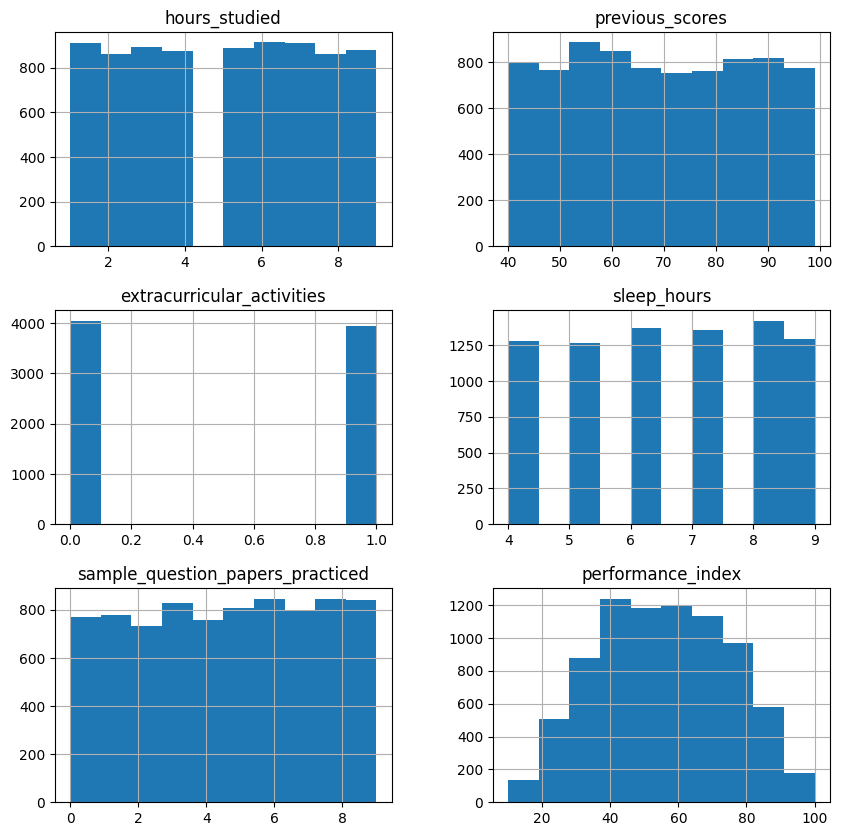

In [ ]:
train_df.hist(figsize=(10, 10));

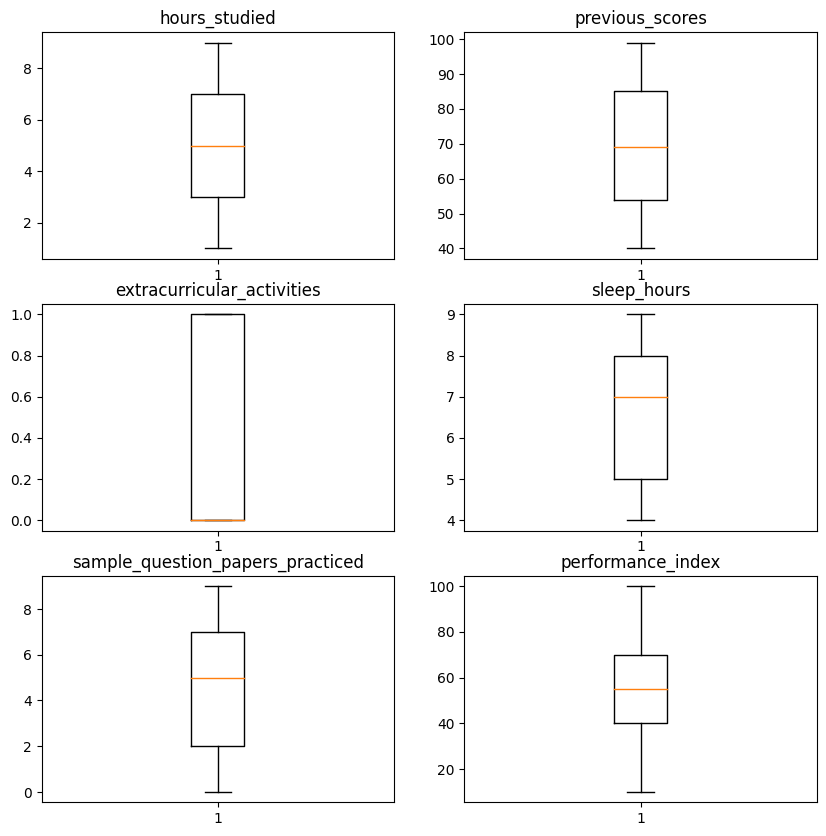

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes_flat = axes.flatten()

for i, col in enumerate(train_df.columns):
  ax = axes_flat[i]
  ax.boxplot(train_df[col])
  ax.set_title(col)

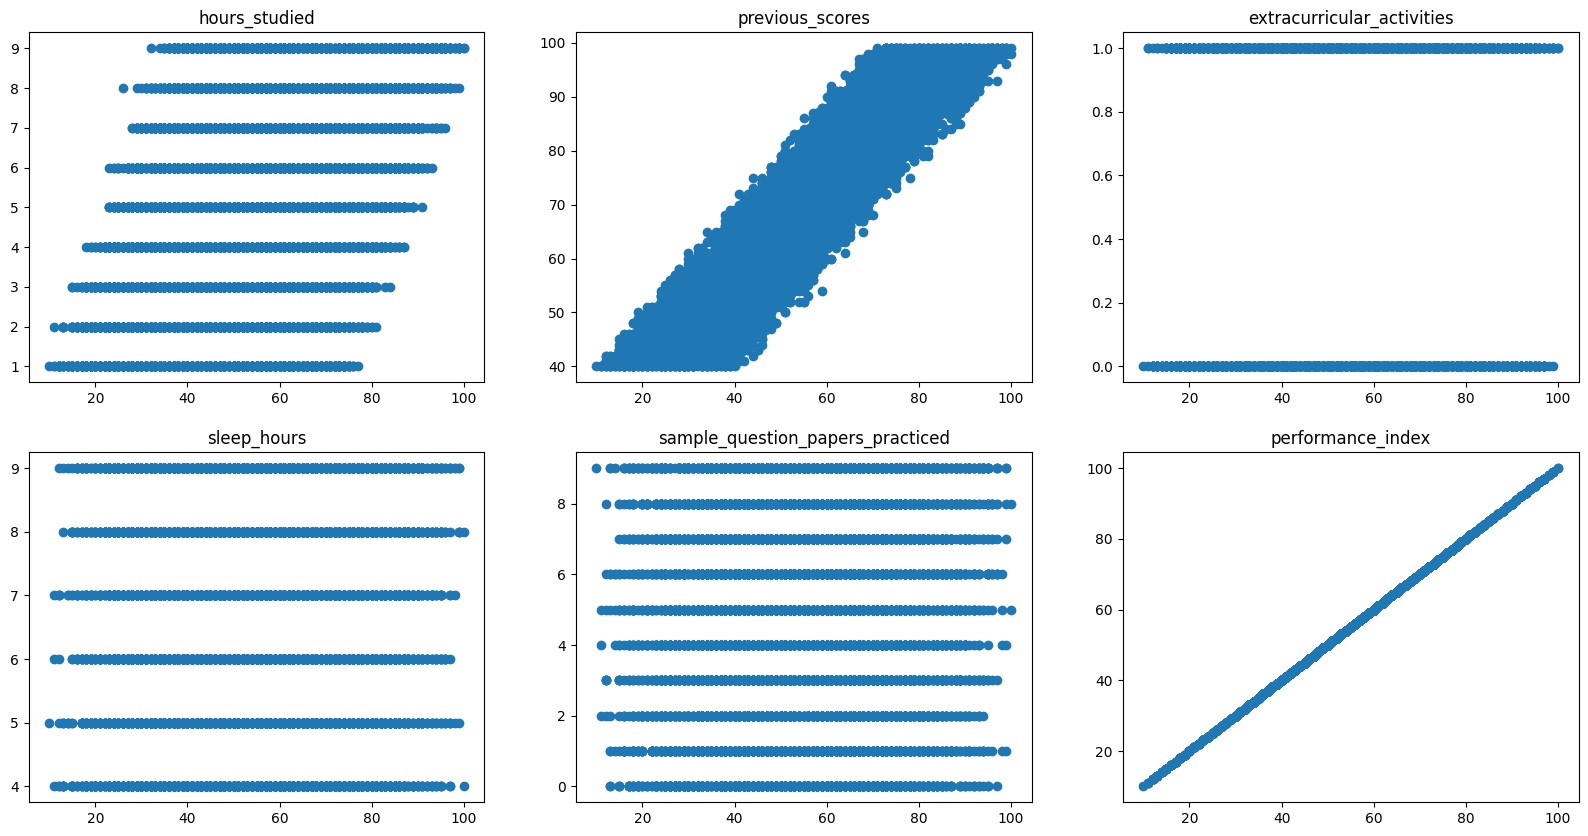

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flat = axes.flatten()

for i, col in enumerate(train_df.columns):
  ax = axes_flat[i]
  ax.scatter(train_df['performance_index'], train_df[col])
  ax.set_title(col)

<Axes: >

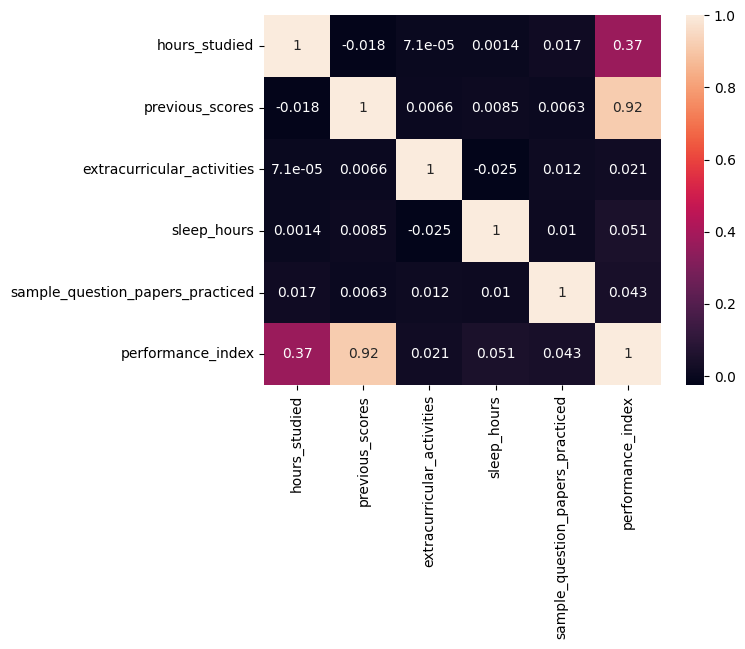

In [ ]:
corr = train_df.corr()
sns.heatmap(corr, annot=True)

## split train_df to x_train and y_train

In [ ]:
x_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
y_train = np.array(y_train).reshape(-1, 1)
x_train.shape, y_train.shape

((8000, 5), (8000, 1))

## Feature Transform

In [ ]:
x_pt = PowerTransformer(method='yeo-johnson', standardize=False)
y_pt = PowerTransformer(method='yeo-johnson', standardize=False)

x_train = x_pt.fit_transform(x_train)
y_train = y_pt.fit_transform(y_train)
x_train, y_train

(array([[ 6.05599518, 29.09695656,  0.66630769,  5.58810725,  5.68973916],
        [ 4.93088916, 27.55625112, -0.        ,  6.28816009,  5.68973916],
        [ 6.05599518, 19.48755251, -0.        ,  4.14114873,  5.0886142 ],
        ...,
        [ 1.6931617 , 33.04620906, -0.        ,  6.28816009,  2.46197513],
        [ 5.50165302, 18.88187651, -0.        ,  6.28816009,  5.0886142 ],
        [ 3.08870419, 31.83491634,  0.66630769,  4.87327327,  6.27514671]]),
 array([[46.46589361],
        [40.73993126],
        [28.7523293 ],
        ...,
        [44.09819079],
        [25.60909223],
        [42.66539913]]))

## Normalization

In [ ]:
x_norm = MinMaxScaler()
y_norm = MinMaxScaler()
x_train = x_norm.fit_transform(x_train)
y_train = y_norm.fit_transform(y_train)
x_train, y_train

(array([[1.        , 0.7374454 , 1.        , 0.6132662 , 0.90671014],
        [0.78157847, 0.64088321, 0.        , 0.80842767, 0.90671014],
        [1.        , 0.13518551, 0.        , 0.20988159, 0.81091557],
        ...,
        [0.15302491, 0.98496088, 0.        , 0.80842767, 0.39233746],
        [0.89238324, 0.09722537, 0.        , 0.80842767, 0.81091557],
        [0.4239474 , 0.90904431, 1.        , 0.41398403, 1.        ]]),
 array([[0.8313674 ],
        [0.70884485],
        [0.45233748],
        ...,
        [0.78070396],
        [0.38507936],
        [0.75004548]]))

## Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Test

### Checking for missing values

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7878 to 2964
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     2000 non-null   int64  
 1   previous_scores                   2000 non-null   int64  
 2   extracurricular_activities        2000 non-null   int64  
 3   sleep_hours                       2000 non-null   int64  
 4   sample_question_papers_practiced  2000 non-null   int64  
 5   performance_index                 2000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 109.4 KB


### split test_df to x_test and y_test

In [ ]:
x_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]
y_test = np.array(y_test).reshape(-1, 1)
x_test.shape, y_test.shape

((2000, 5), (2000, 1))

### Feature Transform

In [ ]:
x_test = x_pt.transform(x_test)
y_test = y_pt.transform(y_test)
x_test, y_test

(array([[ 2.41406468, 19.78744589,  0.66630769,  5.58810725,  3.16159927],
        [ 5.50165302, 17.6453437 , -0.        ,  6.97533856,  2.46197513],
        [ 4.34105658, 31.59028293,  0.66630769,  4.87327327,  0.91321006],
        ...,
        [ 6.05599518, 19.78744589, -0.        ,  5.58810725,  4.46929077],
        [ 0.90491871, 21.83631408,  0.66630769,  5.58810725,  5.68973916],
        [ 4.93088916, 27.55625112,  0.66630769,  5.58810725,  5.0886142 ]]),
 array([[17.37632067],
        [21.84302225],
        [45.0482406 ],
        ...,
        [27.18961708],
        [20.19073952],
        [38.79619561]]))

### Normalization

In [ ]:
x_test = x_norm.transform(x_test)
y_test = y_norm.transform(y_test)
x_test, y_test

(array([[0.29297681, 0.15398103, 1.        , 0.6132662 , 0.50382874],
        [0.89238324, 0.0197269 , 0.        , 1.        , 0.39233746],
        [0.6670718 , 0.89371216, 1.        , 0.41398403, 0.14552808],
        ...,
        [1.        , 0.15398103, 0.        , 0.6132662 , 0.71222092],
        [0.        , 0.28239182, 1.        , 0.6132662 , 0.90671014],
        [0.78157847, 0.64088321, 1.        , 0.6132662 , 0.81091557]]),
 array([[0.20891681],
        [0.30449404],
        [0.80103286],
        ...,
        [0.418899  ],
        [0.26913896],
        [0.66725334]]))

### Score

In [ ]:
model.score(x_test, y_test)

0.9881586146432507